***21022008_NguyenHuuTho***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
abalone = pd.read_csv("/content/drive/MyDrive/TH1391_NLMH/Week10_Thuchanh4/abalone.data")
abalone.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings",]

In [ ]:
abalone = abalone.drop("Sex", axis=1)

In [ ]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

**Tách dữ liệu thành Training data và test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

**kNN Regression trong scikit-learn**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

**Có nhiều chỉ số đánh giá có sẵn cho hồi quy, nhưng bạn sẽ sử dụng một trong những chỉ số phổ biến nhất, lỗi bình phương trung bình gốc (RMSE) . RMSE của một dự đoán được tính như sau:**

1. Tính toán sự khác biệt giữa giá trị thực và giá trị dự đoán của từng điểm dữ liệu.
2. Đối với mỗi sự khác biệt, lấy bình phương của sự khác biệt này.
3. Tính tổng tất cả các chênh lệch bình phương.
4. Lấy căn bậc hai của giá trị tổng.

**Đánh giá hiệu suất trên dữ liệu training**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6775096391638682

**Đánh giá hiệu suất trên dữ liệu test**

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.3359236021240353

**Trực quan hóa biểu đồ**

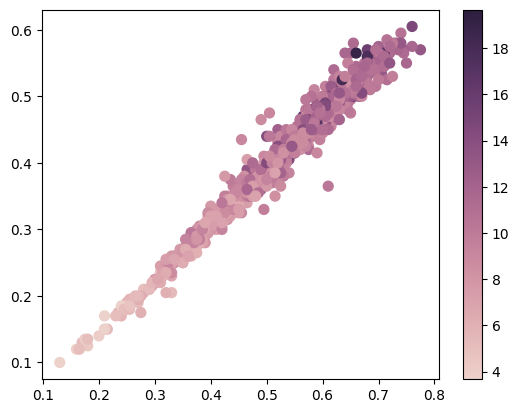

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**Tìm giá trị K tốt nhất dựa trên tỉ lệ rmse thấp nhất giữa giá trị thực tế và dự đoán của train và val**

In [ ]:
rmse_val = []
rmse_train = []
error=[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    predval = model.predict(X_test)
    predtrain = model.predict(X_train)
    errorval = sqrt(mean_squared_error(y_test,predval)) 
    errortrain = sqrt(mean_squared_error(y_train,predtrain))
    rmse_val.append(errorval)
    rmse_train.append(errortrain)
    err=errorval-errortrain
    error.append(err)
    print('RMSE value for k= ' , K , 'is:', err)

for index, item in enumerate(error):
    if item == min(error):
        print(f"n_neighbors: {index}")

RMSE value for k=  1 is: 2.879560040823621
RMSE value for k=  2 is: 1.017493551587311
RMSE value for k=  3 is: 0.6584139629601671
RMSE value for k=  4 is: 0.451479340224626
RMSE value for k=  5 is: 0.3709552033969268
RMSE value for k=  6 is: 0.2890887772450652
RMSE value for k=  7 is: 0.2442063138842332
RMSE value for k=  8 is: 0.20302608179599502
RMSE value for k=  9 is: 0.1876840933958288
RMSE value for k=  10 is: 0.16939276717908913
RMSE value for k=  11 is: 0.13926905938201006
RMSE value for k=  12 is: 0.12211355403186408
RMSE value for k=  13 is: 0.1248956028621735
RMSE value for k=  14 is: 0.11826968835894025
RMSE value for k=  15 is: 0.10432659366885622
RMSE value for k=  16 is: 0.08731263863553762
RMSE value for k=  17 is: 0.08071921524979553
RMSE value for k=  18 is: 0.0718987836303766
RMSE value for k=  19 is: 0.06869003842831622
RMSE value for k=  20 is: 0.05752164842203156
n_neighbors: 19


**Tìm giá trị K tốt nhất dựa trên GridsearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range (1,20)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'n_neighbors': 19}